In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

### Lets load the MNIST datasets from trochvision

In [ ]:
train_dataset = datasets.MNIST(root='/content/', train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='/content/', train=False,
                              transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 114283035.67it/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 8228768.01it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 49278491.96it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 5183817.35it/s]


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/
    Split: Train
    StandardTransform
Transform: ToTensor()

> In the mnist dataset the features are the amount of pixels, in this case 28x28, this means that we have 784 features, and one multiclass label  with 10 possible values (0-9).





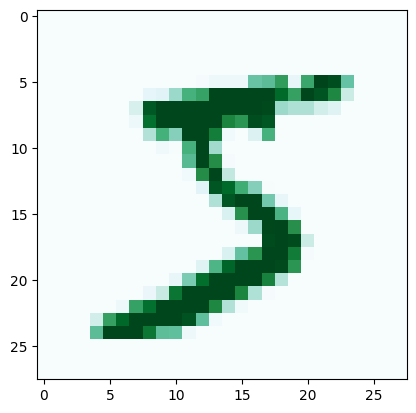

Target:  5


In [ ]:
img = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img, cmap="BuGn")
plt.show()
print("Target: ", train_dataset[0][1])

Load Dataset into DataLoader

In [ ]:
batch_size = 93

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Lets build a custom module for logistic regression

In [ ]:
class LogisticRegression(torch.nn.Module):
    """  """
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

### **Define the model, optimizer and the loss function**

Train the model with SGD(Stochastic Gradient Descent) as the optimizer and Cross Entropy as the loss function

In [ ]:
n_inputs  = 28*28
n_outputs = 10
log_model = LogisticRegression(n_inputs, n_outputs)

optimizer = torch.optim.SGD(log_model.parameters(), lr=0.13)
loss_fn = torch.nn.CrossEntropyLoss()


In [ ]:
epochs = 100
loss_list = []
acc_list = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()

        outputs = log_model(images.view(-1, n_inputs)) # method to flatten the image matrices into rows to fit the same of the logistic regression model input
        loss = loss_fn(outputs, labels)

        loss.backward()
        optimizer.step()

    loss_list.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_model(images.view(-1, n_inputs))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()

    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc_list.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 1.6945191621780396. Accuracy: 86.26
Epoch: 1. Loss: 1.6687417030334473. Accuracy: 87.44
Epoch: 2. Loss: 1.6285934448242188. Accuracy: 87.91
Epoch: 3. Loss: 1.5857954025268555. Accuracy: 88.62
Epoch: 4. Loss: 1.663986325263977. Accuracy: 88.74
Epoch: 5. Loss: 1.6012860536575317. Accuracy: 88.94
Epoch: 6. Loss: 1.5404835939407349. Accuracy: 89.19
Epoch: 7. Loss: 1.6102995872497559. Accuracy: 89.38
Epoch: 8. Loss: 1.5836235284805298. Accuracy: 89.56
Epoch: 9. Loss: 1.5673494338989258. Accuracy: 89.53
Epoch: 10. Loss: 1.7036919593811035. Accuracy: 89.67
Epoch: 11. Loss: 1.5791922807693481. Accuracy: 89.84
Epoch: 12. Loss: 1.5992318391799927. Accuracy: 89.96
Epoch: 13. Loss: 1.5604100227355957. Accuracy: 89.97
Epoch: 14. Loss: 1.5424853563308716. Accuracy: 90.0
Epoch: 15. Loss: 1.6191272735595703. Accuracy: 90.0
Epoch: 16. Loss: 1.528765082359314. Accuracy: 90.09
Epoch: 17. Loss: 1.5833252668380737. Accuracy: 90.12
Epoch: 18. Loss: 1.6682041883468628. Accuracy: 90.22
Epoch: 

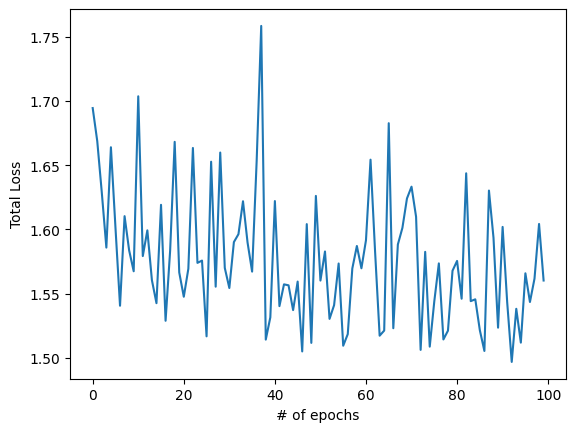

In [ ]:
plt.plot(loss_list)
plt.xlabel("# of epochs")
plt.ylabel("Total Loss")
plt.show()

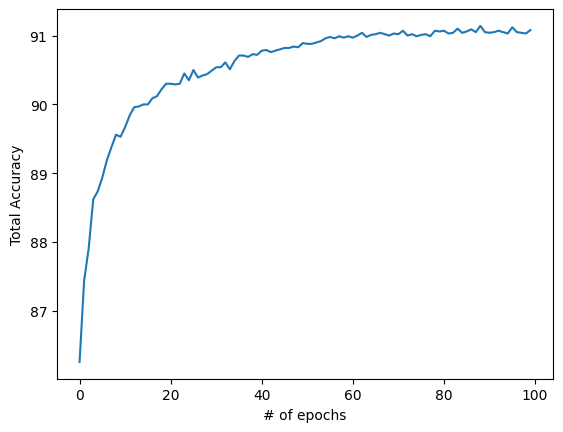

In [ ]:

plt.plot(acc_list)
plt.xlabel("# of epochs")
plt.ylabel("Total Accuracy")
plt.show()

In [ ]:
torch.save(log_model, "mnist_logistic_regresion")